In [3]:
import pandas as pd
import numpy as np

In [6]:
df = pd.read_csv("Admission_Predict.csv")

In [8]:
df.shape

(400, 9)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [12]:
df.duplicated().sum()

0

In [14]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [18]:
df.drop(columns=["Serial No."],inplace=True)

In [19]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [20]:
X = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=1)

In [22]:
X_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
93,301,97,2,3.0,3.0,7.88,1
23,334,119,5,5.0,4.5,9.70,1
299,305,112,3,3.0,3.5,8.65,0
13,307,109,3,4.0,3.0,8.00,1
90,318,106,2,4.0,4.0,7.92,1
...,...,...,...,...,...,...,...
255,307,110,4,4.0,4.5,8.37,0
72,321,111,5,5.0,5.0,9.45,1
396,325,107,3,3.0,3.5,9.11,1
235,326,111,5,4.5,4.0,9.23,1


In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled =  scaler.transform(X_test)

In [26]:
X_train_scaled

array([[0.22      , 0.17857143, 0.25      , ..., 0.42857143, 0.25      ,
        1.        ],
       [0.88      , 0.96428571, 1.        , ..., 0.85714286, 0.91911765,
        1.        ],
       [0.3       , 0.71428571, 0.5       , ..., 0.57142857, 0.53308824,
        0.        ],
       ...,
       [0.7       , 0.53571429, 0.5       , ..., 0.57142857, 0.70220588,
        1.        ],
       [0.72      , 0.67857143, 1.        , ..., 0.71428571, 0.74632353,
        1.        ],
       [0.2       , 0.46428571, 0.        , ..., 0.14285714, 0.22058824,
        0.        ]])

In [27]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [40]:
model = Sequential()

model.add(Dense(7,activation="relu", input_dim=7))
model.add(Dense(7,activation="relu", input_dim=7))
model.add(Dense(1,activation="linear")) #last layer node linear for regression problem

In [41]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 7)                 56        
                                                                 
 dense_3 (Dense)             (None, 7)                 56        
                                                                 
 dense_4 (Dense)             (None, 1)                 8         
                                                                 
Total params: 120
Trainable params: 120
Non-trainable params: 0
_________________________________________________________________


In [42]:
model.compile(loss="mean_squared_error", optimizer="adam")

In [43]:
histoy = model.fit(X_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100


C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\data_adapter.py:1696: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


8/8 [==============================] - 1s 36ms/step - loss: 0.6795 - val_loss: 0.7156
Epoch 2/100
8/8 [==============================] - 0s 11ms/step - loss: 0.6090 - val_loss: 0.6443
Epoch 3/100
8/8 [==============================] - 0s 20ms/step - loss: 0.5501 - val_loss: 0.5841
Epoch 4/100
8/8 [==============================] - 0s 12ms/step - loss: 0.4997 - val_loss: 0.5319
Epoch 5/100
8/8 [==============================] - 0s 10ms/step - loss: 0.4571 - val_loss: 0.4848
Epoch 6/100
8/8 [==============================] - 0s 11ms/step - loss: 0.4170 - val_loss: 0.4409
Epoch 7/100
8/8 [==============================] - 0s 11ms/step - loss: 0.3784 - val_loss: 0.3987
Epoch 8/100
8/8 [==============================] - 0s 12ms/step - loss: 0.3418 - val_loss: 0.3575
Epoch 9/100
8/8 [==============================] - 0s 11ms/step - loss: 0.3059 - val_loss: 0.3180
Epoch 10/100
8/8 [==============================] - 0s 13ms/step - loss: 0.2716 - val_loss: 0.2806
Epoch 11/100
8/8 [=============

8/8 [==============================] - 0s 12ms/step - loss: 0.0051 - val_loss: 0.0045
Epoch 85/100
8/8 [==============================] - 0s 11ms/step - loss: 0.0051 - val_loss: 0.0044
Epoch 86/100
8/8 [==============================] - 0s 12ms/step - loss: 0.0051 - val_loss: 0.0044
Epoch 87/100
8/8 [==============================] - 0s 10ms/step - loss: 0.0051 - val_loss: 0.0045
Epoch 88/100
8/8 [==============================] - 0s 10ms/step - loss: 0.0050 - val_loss: 0.0044
Epoch 89/100
8/8 [==============================] - 0s 10ms/step - loss: 0.0050 - val_loss: 0.0043
Epoch 90/100
8/8 [==============================] - 0s 11ms/step - loss: 0.0049 - val_loss: 0.0043
Epoch 91/100
8/8 [==============================] - 0s 10ms/step - loss: 0.0049 - val_loss: 0.0043
Epoch 92/100
8/8 [==============================] - 0s 12ms/step - loss: 0.0049 - val_loss: 0.0043
Epoch 93/100
8/8 [==============================] - 0s 9ms/step - loss: 0.0049 - val_loss: 0.0043
Epoch 94/100
8/8 [======

In [44]:
y_pred=model.predict(X_test_scaled)

3/3 [==============================] - 0s 4ms/step


In [45]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8156026327342315

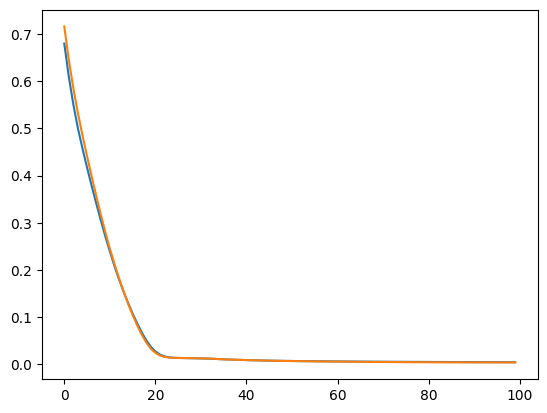

In [48]:
import matplotlib.pyplot as plt
plt.plot(histoy.history["loss"])
plt.plot(histoy.history["val_loss"])